In [22]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
######################################################
#
#           START WITH LOADING ARRAY
#
#
#########Loaded Gray and Non-Gray Arrays##############
######################################################

In [2]:
#needed packages

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import numpy as np

import cv2
from PIL import Image, ImageFile

from sklearn.manifold import TSNE
from sklearn import preprocessing, mixture
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import ndimage
import scipy.misc

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D

from skimage.io import imread, imshow

import os, os.path, sys
from os import listdir
from os.path import isfile, join

import glob

import pandas as pd

import seaborn as sns


import imageio
from IPython.display import display
from IPython.display import Image as _Imgdis

Using TensorFlow backend.


In [15]:
#temporary cell to run additional packages if needed


In [3]:
#load the rbg npy arrays 
arr_in_rbg = np.load('array_file_rbg.npy')

In [4]:
#load gray npy array
arr_in_gray = np.load('array_file_gray.npy')

In [5]:
#load y_train array (type)
y_train = np.load('y_train_types.npy')

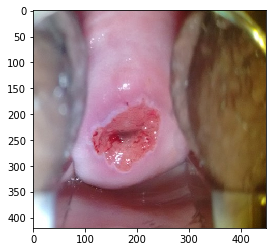

In [6]:
#test loaded files
plt.imshow(cv2.cvtColor(arr_in_rbg[0], cv2.COLOR_BGR2RGB))

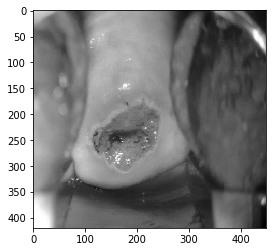

In [7]:
plt.imshow(arr_in_gray[0], cmap="gray")

In [8]:
#make sure y variable imported correctly.
y_train[-20], len(y_train)

('Type_3', 2288)

In [12]:
#print(arr_in_rbg.shape)

#commented out because using gray scale images

In [9]:
print(arr_in_gray.shape)

(2288, 420, 450)


In [10]:
arr_gray_flat = arr_in_gray.reshape((arr_in_gray.shape[0],-1))

In [11]:
print(arr_gray_flat.shape)

(2288, 189000)


In [12]:
#perform pca on grey scale data

#first PCA run using code below.  Set at 0.93 to identify number of 
#components needed to explain 93% of variance.
# result was that 117 principal components are needed
# x,y = arr_gray_flat, y_train
# pca_tr = PCA(0.93)
# x_proj = pca_tr.fit_transform(x)
# print(x_proj.shape)

#next re-run and 121 components specified (121 chosen as easy split if
#additional dimensions are needed, ie: 11X11 pixel matrix)
x,y = arr_gray_flat, y_train
pca_tr = PCA(121)
x_proj = pca_tr.fit_transform(x)
print(x_proj.shape)



(2288, 121)


In [13]:
#x.shape is same as printing the shape of the array (arr_gray_flat)
print(x.shape)

(2288, 189000)


In [14]:
#print the variance for the number of components: 121 comps=93.2% var explained
print (np.cumsum(pca_tr.explained_variance_ratio_))

[0.22364713 0.34931967 0.436958   0.51019458 0.5573489  0.58902001
 0.61989491 0.64173478 0.66246749 0.67934914 0.69517286 0.70895486
 0.72085109 0.73118072 0.74072065 0.74993366 0.75826385 0.76573701
 0.77274839 0.77943811 0.78553875 0.79142159 0.79686033 0.80199638
 0.80667986 0.81088974 0.81478743 0.81865403 0.82227528 0.82572154
 0.8291205  0.83232384 0.83540451 0.83828802 0.84110387 0.84375008
 0.84632263 0.84883018 0.85121817 0.85354238 0.85578428 0.85793181
 0.85999161 0.86202613 0.86392756 0.86579365 0.8676059  0.86940282
 0.87112583 0.87279345 0.87440033 0.87593593 0.87742463 0.87890144
 0.88033609 0.88174123 0.8831113  0.88446032 0.88578575 0.88707836
 0.88831395 0.8895115  0.89068506 0.89185508 0.89298943 0.89409318
 0.89518287 0.89624596 0.8972909  0.89832018 0.89932847 0.90030981
 0.90127259 0.9022099  0.9031403  0.90406372 0.90494862 0.9058224
 0.9066619  0.90748467 0.90830111 0.90909926 0.90988079 0.91065499
 0.91141544 0.91216785 0.91289705 0.9136165  0.9143218  0.91502

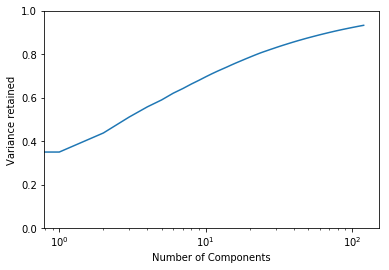

In [15]:
plt.semilogx(np.cumsum(pca_tr.explained_variance_ratio_))
plt.xlabel('Number of Components') 
plt.ylabel('Variance retained')
plt.ylim(0,1)
plt.show()

In [15]:
#plot example images to show at rbg images 420x450 resolution
#commented out since using gray scale

# fig = plt.figure(figsize=(6,6))
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# for i in range(64):
#     ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
#     ax.imshow(cv2.cvtColor(arr_in_rbg[i], cv2.COLOR_BGR2RGB), cmap=plt.cm.bone, interpolation='nearest')

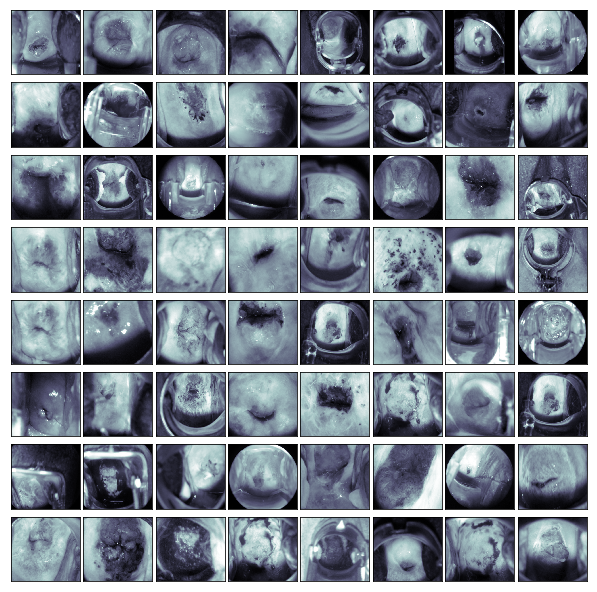

In [16]:
#plot example images to show gray scale images at 420x450 resolution

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(arr_in_gray[i], cmap=plt.cm.bone, interpolation='nearest')

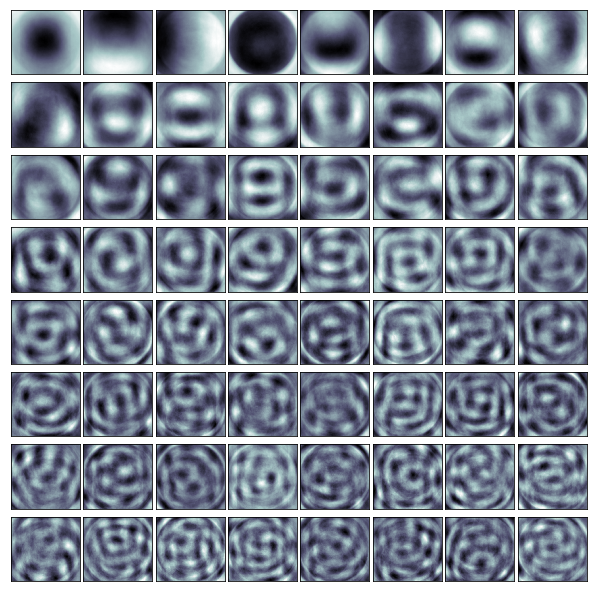

In [17]:
#plot example images to show at 12x12 resolution

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax1 = fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
    ax1.imshow(np.reshape(pca_tr.components_[i,:], (420,450)), cmap=plt.cm.bone, interpolation='nearest')
    
    #ax.imshow(cv2.cvtColor(arr_in_rbg[i], cv2.COLOR_BGR2RGB), cmap=plt.cm.bone, interpolation='nearest')

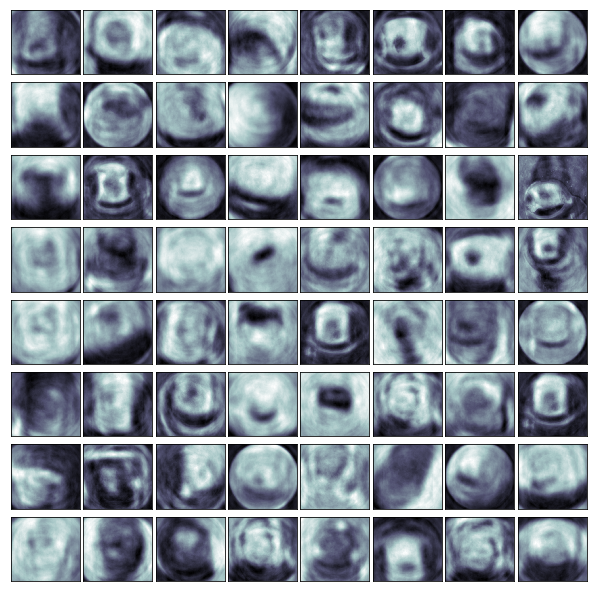

In [18]:
#reconstruct the images back to make sure there were no issues
#take the 2288x121 PCA data and reshape back to 2288,420,450 size and plot
#using only the first 121 components

#see this website cause you will never figure out how to inverse transform on 
#your own: https://shankarmsy.github.io/posts/pca-sklearn.html

x_inv_proj = pca_tr.inverse_transform(x_proj)

x_proj_img = np.reshape(x_inv_proj, (2288, 420, 450))

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax2 = fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
    ax2.imshow(x_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

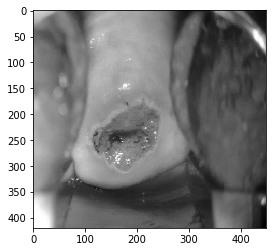

In [19]:
#original gray scale image
plt.imshow(arr_in_gray[0], cmap="gray")

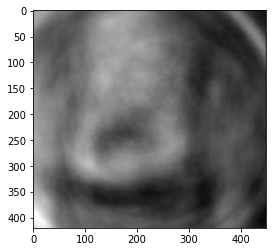

In [20]:
#PCA dimension reduction image
plt.imshow(x_proj_img[0], cmap="gray")

In [21]:
#x_proj_img is an image that has had dimensions reduced

print(x_proj.shape)

(2288, 121)


In [39]:
#save the reduced dimension gray file as an np array to be used in a model
np.save("array_file_gray_PCA", x_proj)


np.save("array_file_gray_PCA_rebuilt", x_proj_img)

In [ ]:
###################################################
#
#
#          Prepare the test file 
#
#
###################################################

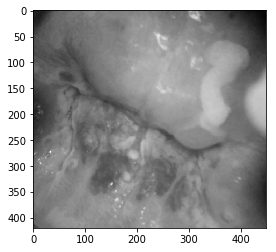

In [23]:

#load the gray tst npy array file
arr_in_tst_gray = np.load('array_file_tst_gray.npy')

#load the rbg tst npy array file
#note: this model is not using rbg array data so its commented out
#arr_in_tst_rbg = np.load('array_file_tst_rbg.npy')

#test loaded files
#test gray files

#test rbg files
plt.imshow(arr_in_tst_gray[0], cmap="gray")

#test loaded files (note: rbg not used to commented out)
#plt.imshow(cv2.cvtColor(arr_in_tst_rbg[0], cv2.COLOR_BGR2RGB))

#perform PCA


In [24]:
#check shape of gray tst array
print(arr_in_tst_gray.shape)

(512, 420, 450)


In [25]:
#flatten gray test data
arr_gray_tst_flat = arr_in_tst_gray.reshape((arr_in_tst_gray.shape[0],-1))

In [26]:
#check shape of flattened gray test data
print(arr_gray_tst_flat.shape)

(512, 189000)


In [27]:
#run PCA to reduce dimensions of test data
#reduction specs should match those of the train data specs so check first

z = arr_gray_tst_flat
pca_tst = PCA(121)
x_tst = pca_tst.fit_transform(z)
print(x_tst.shape)

(512, 121)


In [ ]:
#####################################################
#remaining code below is just to check the test data after PCA
#it doesn't need to be run

In [29]:
#print the variance for the number of components: 121 comps 
#121 is based on tr data specs

print (np.cumsum(pca_tst.explained_variance_ratio_))

[0.19666238 0.32591409 0.41477234 0.48515524 0.53793427 0.57579523
 0.60795258 0.63360621 0.65463632 0.67314019 0.68936732 0.7035362
 0.71671417 0.72800576 0.73896517 0.74852311 0.75710772 0.7650426
 0.77238915 0.77952808 0.78598956 0.79210317 0.79788788 0.803561
 0.80871611 0.81370544 0.81859141 0.82311006 0.82739306 0.83151161
 0.83532257 0.839066   0.84247582 0.84575298 0.84887213 0.8517911
 0.85465533 0.85745209 0.86015991 0.8627743  0.86529685 0.86770506
 0.8700312  0.87232544 0.87453169 0.87661106 0.87866011 0.88066888
 0.88263757 0.88452925 0.88633525 0.88810088 0.88980249 0.89146965
 0.89312092 0.894735   0.89629615 0.89783513 0.89931556 0.90075701
 0.90212164 0.90348008 0.90482045 0.90613127 0.90740627 0.90865672
 0.90988443 0.91108741 0.91224718 0.91339357 0.91452228 0.91560353
 0.91667343 0.9177282  0.91876199 0.91978827 0.92078715 0.92177726
 0.92273865 0.92369818 0.92463489 0.92553725 0.92642971 0.92729753
 0.92815314 0.92900002 0.92983789 0.93065001 0.93145596 0.93225887


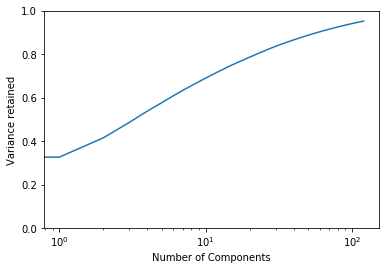

In [30]:
#plot to see variance explained with test data

plt.semilogx(np.cumsum(pca_tst.explained_variance_ratio_))
plt.xlabel('Number of Components') 
plt.ylabel('Variance retained')
plt.ylim(0,1)
plt.show()

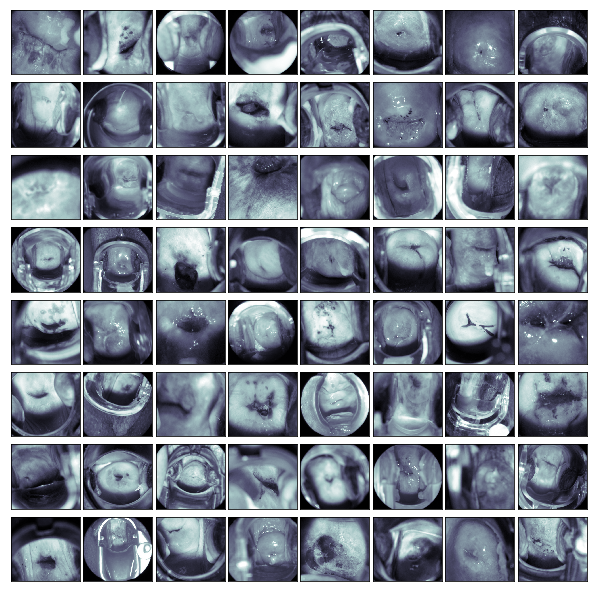

In [31]:
#plot example images to show gray scale images at 420x450 resolution

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(arr_in_tst_gray[i], cmap=plt.cm.bone, interpolation='nearest')

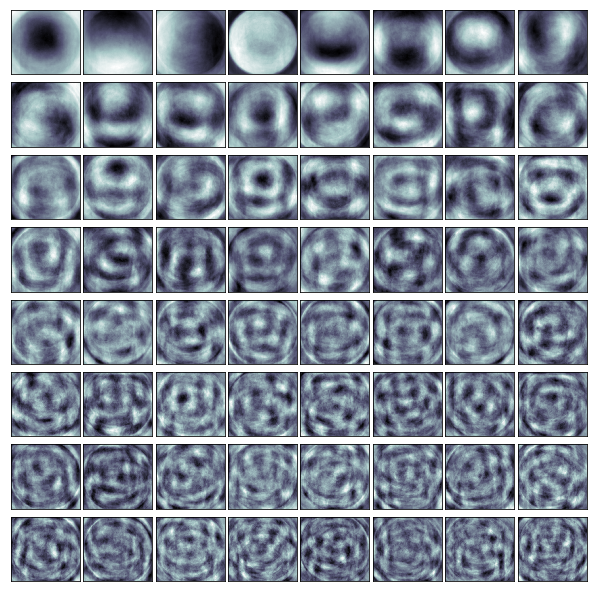

In [32]:
#plot example images to show at 12x12 resolution

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax3 = fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
    ax3.imshow(np.reshape(pca_tst.components_[i,:], (420,450)), cmap=plt.cm.bone, interpolation='nearest')
    
    #ax.imshow(cv2.cvtColor(arr_in_rbg[i], cv2.COLOR_BGR2RGB), cmap=plt.cm.bone, interpolation='nearest')

In [40]:
#reconstruct the images back to make sure there were no issues
#take the 512x121 PCA data and reshape back to 512,420,450 size and plot
#using only the first 121 components

x_inv_tst = pca_tst.inverse_transform(x_tst)

x_tst_img = np.reshape(x_inv_tst, (512, 420, 450))

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax4 = fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
    ax4.imshow(x_tst_img[i], cmap=plt.cm.bone, interpolation='nearest')

ValueError: cannot reshape array of size 96768000 into shape (512,10,11)

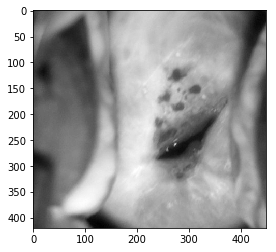

In [34]:
#original gray scale image
plt.imshow(arr_in_tst_gray[1], cmap="gray")

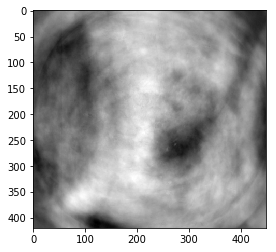

In [35]:
#PCA dimension reduction image
plt.imshow(x_tst_img[1], cmap="gray")

In [36]:
#x_proj_img is an image that has had dimensions reduced

print(x_tst.shape)

(512, 121)


In [38]:
#save the reduced test file data as nparray for use in model later
np.save("array_file_tst_gray_PCA", x_tst)


np.save("array_file_tst_gray_PCA_rebuilt", x_tst_img)


In [ ]:
#######################################
#
#
# Train a SVM classification model
#
#
#######################################

In [35]:
#from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

In [ ]:


print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }


clf = GridSearchCV(SVC(kernel='rbf', class_weight='auto'), param_grid)
clf = clf.fit(x_proj, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

In [ ]:
edi image pack in R: resize after transformed images to 
    
    subsample pictures